# Sine Example

This example trains a neural operator on the sine function in a self-supervised 
manner.

## Setup

Import modules.

In [1]:
import torch
import matplotlib.pyplot as plt
from continuity.data.datasets import Sine
from continuity.plotting.plotting import *
from continuity.model.operators import NeuralOperator
plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)

## Data set

Create a data set of sine waves with 32 sensors.

In [2]:
size = 4
dataset = Sine(
    num_sensors=16,
    size=size,
)

## Neural operator

Create a neural operator.

In [3]:
model = NeuralOperator(
    coordinate_dim=dataset.coordinate_dim,
    num_channels=dataset.num_channels,
    depth=1,
    kernel_width=32,
    kernel_depth=3,
)

## Training

Train the neural operator in a self-supervised manner.

In [4]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()

model.compile(optimizer, criterion)
model.fit(dataset, epochs=1000)

Model parameters: 9795
Epoch 1000:  loss = 4.5429e-03  (92.33 it/s)


## Plotting

Plot training data and predictions.

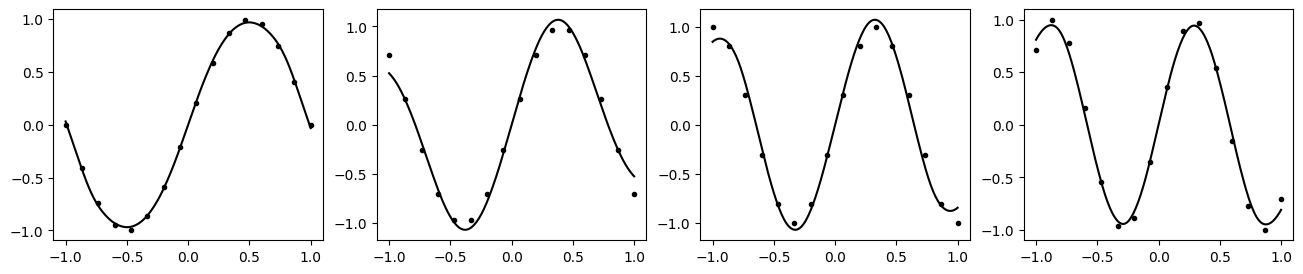

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(16, 3))
for i in range(size):
    obs = dataset.get_observation(i)
    plot_evaluation(model, obs, ax=axs[i])
    plot_observation(obs, ax=axs[i])

Plot test observations and predictions.

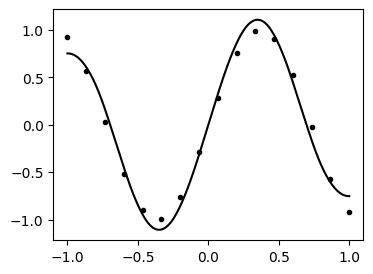

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
i_test = (size-1) / 2
obs = dataset.generate_observation(i_test)
plot_evaluation(model, obs, ax=ax)
plot_observation(obs, ax=ax)